# ACSE-7 (Optimisation & Inversion) <a class="tocSkip">

## Lecture 2 <a class="tocSkip">
    
### Homework Exercises - Solutions <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Optimisation---simple-example" data-toc-modified-id="Homework---Optimisation---simple-example-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Optimisation - simple example</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---$2\times-2$-linear-systems" data-toc-modified-id="Homework---$2\times-2$-linear-systems-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - $2\times 2$ linear systems</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---Using-row-operations-to-solve-the-linear-system-and-find-the-inverse-matrix" data-toc-modified-id="Homework---Using-row-operations-to-solve-the-linear-system-and-find-the-inverse-matrix-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Using row operations to solve the linear system and find the inverse matrix</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li></ul></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from pprint import pprint
import scipy.interpolate as si

# Homework

## Homework - Optimisation - simple example

Consider the problem from the lecture
$$ 
f(\boldsymbol{x}) = 
1+2x + 4y + x^2+2xy+3y^2
$$

Compute the gradient vector, and by setting it equal to zero and writing as a matrix equation,
solve for the stationary point. 

Plot the function via a contour plot in 2D, and add the stationay point you've computed to verify it is indeed a minima (refer to the image from the lecture).

### Solution 

The gradient vector is

$$\nabla f= 
\begin{pmatrix}
2 + 2x + 2y\\
4 + 2x + 6y
\end{pmatrix}
$$

We can write this as a linear system:

$$
\nabla f = \begin{pmatrix}
2 & 2\\
2 & 6
\end{pmatrix}
\begin{pmatrix}
x\\
y
\end{pmatrix}
+
\begin{pmatrix}
2\\
4
\end{pmatrix}
$$

So $\nabla f = 0$ when 

$$
\begin{pmatrix}
2 & 2\\
2 & 6
\end{pmatrix}
\begin{pmatrix}
x\\
y
\end{pmatrix}
=
\begin{pmatrix}
-2\\
-4
\end{pmatrix}
$$

Let's use a contour plot to visualise the function in 2D, solve for the minimum (the stationary point) and plot it:

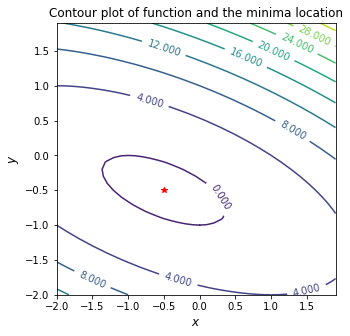

In [2]:
dx = 0.1
x = np.arange(-2.0, 2.0, dx)
y = np.arange(-2.0, 2.0, dx)
X, Y = np.meshgrid(x, y)
f = 1. + 2.*X + 4.*Y + X**2 + 2.*X*Y + 3.*Y**2 

fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

cs = ax1.contour(X, Y, f, 10)
ax1.clabel(cs, inline=1, fontsize=10)
ax1.set_title('Contour plot of function and the minima location')
ax1.set_xlabel('$x$', fontsize=12)
ax1.set_ylabel('$y$', fontsize=12)

# solve the linear system for x,y
A = np.array([[2,2],[2,6]])
b = np.array([-2,-4])
x = sl.solve(A,b)
ax1.plot(x[0],x[1],'r*')
#plt.savefig('simple_optimisation.png')

## Homework - $2\times 2$ linear systems

Recall from the lecture the system

\begin{eqnarray*}
  2x + 3y &=& 7 \\[5pt]
   x - 4y &=& 3,
\end{eqnarray*} 

and the following plot which demonstrated a unique solution.

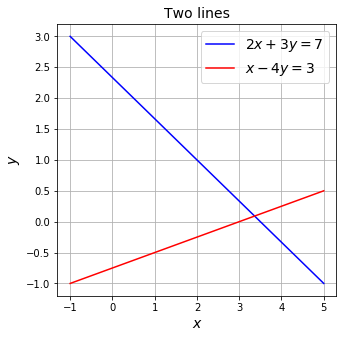

In [3]:
# unique solution
x = np.linspace(-1,5,100)
y1 = -(2./3.)*x + (7./3.)
y2 = (1./4.)*x - (3./4.)

fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.set_title('Two lines', fontsize=14)
ax1.grid(True)

ax1.plot(x,y1,'b', label='$2x+3y=7$')
ax1.plot(x,y2,'r', label='$x-4y=3$')

ax1.legend(loc='best', fontsize=14);

You were asked in class what other situations are possible and to construct examples and the corresponding plots - try to come up with and plot these situations.

Hint: I used the following example as a starting point which was also discussed in the lecture

$$
\left(
  \begin{array}{rr}
    2 & 3 \\
    4 & 6 
  \end{array}
\right)\left(
  \begin{array}{c}
    x \\
    y
  \end{array}
\right) = \left(
  \begin{array}{c}
    4 \\
    8
  \end{array}
\right),
$$

with a second RHS vector of 

$$
\left(
  \begin{array}{c}
    4 \\
    7
  \end{array}
\right)
$$

### Solution 

Consider the problem

$$
\left(
  \begin{array}{rr}
    2 & 3 \\
    4 & 6 
  \end{array}
\right)\left(
  \begin{array}{c}
    x \\
    y
  \end{array}
\right) = \left(
  \begin{array}{c}
    4 \\
    8
  \end{array}
\right),
$$

where the matrix on the LHS clearly has a zero determinant.

Considering now the values in the RHS vector as well, the second equation is simply twice the first, and hence a solution to the first equation is also automatically a solution to the second equation. 

If we think geometrically, and interpret the two equations as constraints, they are **both** constraining our $x,y$ values to the same 1D subspace - any solution along this line in 2D satisfies **both** equations, and hence any of them is a solution to our linear system.

We hence only have one *linearly-independent* equation here, and our problem is under-constrained: we effectively only have one equation for two unknowns and this problem has *infinitely many* possibly solutions (or said another way, we have *existence*, but *non-uniqueness*): e.g. $\boldsymbol{x}=(2,0)^T$ is a solution, so is $\boldsymbol{x}=(-1,2)^T$, etc.


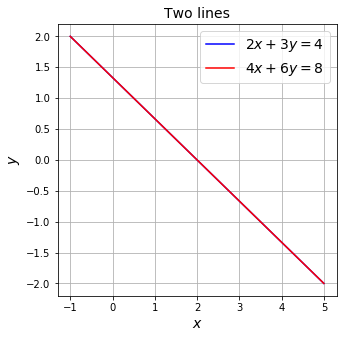

In [4]:
# consider the following situation
x = np.linspace(-1,5,100)
y1 = -(2./3.)*x + (4./3.)
y2 = -(4./6.)*x + (8./6.)

fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.set_title('Two lines', fontsize=14)
ax1.grid(True)

ax1.plot(x,y1,'b', label='$2x+3y=4$')
ax1.plot(x,y2,'r', label='$4x+6y=8$')

ax1.legend(loc='best', fontsize=14);

The following are all true, but not all equivalent statements:

1. The lines now intersect at infinitely many points - not at all points in 2D, but along a 1D subspace embedded within 2D.

2. We therefore have a continuous family of $(x,y)$ pairs of values that satisfy both equations simultaneously.

3. The linear/matrix system has infinitely many solutions (our previous *no solution existence* situation has become a *non-uniqueness* situation).

4. The corresponding matrix has zero determinant.

5. The matrix has no inverse.

Let's check point 4:


In [5]:
A = np.array([[2,3],[4,6]])
print('The determinant is: ',sl.det(A))
print('This is effectively zero:',np.allclose(0,sl.det(A)))

The determinant is:  -6.661338147750939e-16
This is effectively zero: True


Any pair of values that satisfies 

$$x = (4-3y)/2$$

is an exact solution.  Typically we will write solutions of this type in the form  

\begin{align*}
x &= (4-3\alpha)/2\\
y &= \alpha
\end{align*}

where $\alpha$ is an arbitrary constant.

If we instead replaced the RHS vector with $(4,7)^T$, then the two equations would now be contradictory: in this case we have *no solutions* (or *non-existence*).

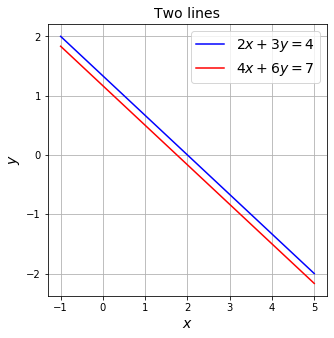

In [6]:
# consider the following situation
x = np.linspace(-1,5,100)
y1 = -(2./3.)*x + (4./3.)
y2 = -(4./6.)*x + (7./6.)

fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.set_title('Two lines', fontsize=14)
ax1.grid(True)

ax1.plot(x,y1,'b', label='$2x+3y=4$')
ax1.plot(x,y2,'r', label='$4x+6y=7$')

ax1.legend(loc='best', fontsize=14);

For this case some of our previous statements will still hold (as the LHS matrix is unchanged), but some will change (as the RHS vector is different):


1. The lines do not intersect at any point.

2. No single $(x,y)$ pair of values can satisfy both equations simultaneously.

3. The linear/matrix system has no solution (we are in a *no solution existence* situation).

4. The corresponding matrix has zero determinant.

5. The matrix has no inverse.


So 4 and 5 haven't changed, but the change in RHS vector has changed 1,2,3 dramatically.


To summarise, other than cases with a unique solution, 2D linear systems can also have no solutions or infinitely many solutions. If we want existence **AND** uniqueness of solution of course both scenarios aren't good!

## Homework - Using row operations to solve the linear system and find the inverse matrix

Consider the linear system

$$
  \begin{pmatrix}
    2 & 3 \\
    1 & -4  
  \end{pmatrix}
  \begin{pmatrix}
    x \\
    y 
  \end{pmatrix}=
  \begin{pmatrix}
    7 \\
    3 
  \end{pmatrix}   
$$

  
form the augmented matrix  $[A|\boldsymbol{b}|I]$ and perform row operations to obtain $[I|\boldsymbol{x}|A^{-1}]$.

### Solution

We can perform these operations in a way that is easy to keep track of by forming the augmented matrix (we add the RHS vector as an additional column). 

In this demonstration where we also want to form the inverse matrix let's additionally add columns corresponding to the inverse matrix. 

The notation above the arrows should hopefully be clear, it's encoding the operations we are performing on the rows, with '(1)' and '(2)' identifying the first and second row, respectively. '$(1)\leftarrow (1)-2(2)$' means replace the first row with the first row minus twice the second row - the operation we performed above.

When we perform these operations on the rows of the matrix $A$, we also apply them to the additional columns in our augmented matrix:

\begin{align*}
[A \, | \, \boldsymbol{b} \, | \, I] = 
&\left[
  \begin{array}{cc|c|cc}
    2 & 3 & 7 & 1 & 0 \\
    1 & -4 & 3 & 0 & 1  
  \end{array}
\right]
\xrightarrow{(1)\leftarrow (1)-2(2)}
\left[
  \begin{array}{cc|c|cc}
    0 & 11 & 1 & 1 & -2 \\
    1 & -4 & 3 & 0 & 1  
  \end{array}
\right]
\xrightarrow{(1)\leftarrow (1)/11}
\left[
  \begin{array}{cc|c|cc}
    0 & 1 & 1/11 & 1/11 & -2/11 \\
    1 & -4 & 3 & 0 & 1  
  \end{array}
\right]\\
&\xrightarrow{(2)\leftarrow (2)+4(1)}
\left[
  \begin{array}{cc|c|cc}
    0 & 1 & 1/11 & 1/11 & -2/11 \\
    1 & 0 & 3+4/11 & 4/11 & 1-8/11  
  \end{array}
\right]
\xrightarrow{(1)\leftrightarrow (2)}
\left[
  \begin{array}{cc|c|cc}
    1 & 0 & 3+4/11 & 4/11 & 1-8/11  \\
    0 & 1 & 1/11 & 1/11 & -2/11 
  \end{array}
\right]
\end{align*}

Now the fact that we have transformed $A$ into $I$ via these so-called *row operations* means that what was originally in the $\boldsymbol{b}$ position is now the solution $\boldsymbol{x}$, and what was originally $I$ is now $A^{-1}$:

$$\boldsymbol{x} =
\begin{pmatrix}
3+4/11\\
1/11
\end{pmatrix}=
\begin{pmatrix}
37/11\\
1/11
\end{pmatrix},\qquad
A^{-1} = 
\begin{pmatrix}
    4/11 & 1-8/11  \\
    1/11 & -2/11 
\end{pmatrix}= 
\begin{pmatrix}
    4/11 & 3/11  \\
    1/11 & -2/11 
\end{pmatrix}= \frac{-1}{11}
\begin{pmatrix}
    -4 & -3  \\
    -1 & 2 
\end{pmatrix}
$$


We can check this answer against our expression for the inverse of a $2\times 2$ linear system.
